In [7]:
## FedBiscuit

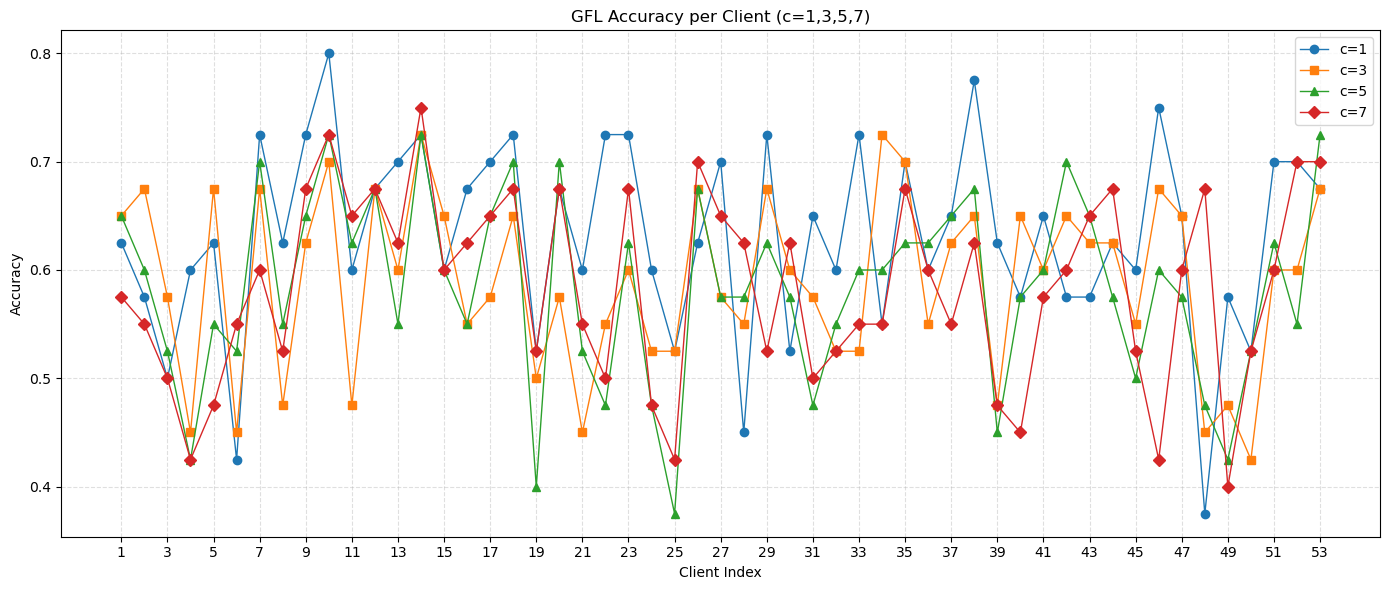

In [4]:
# -*- coding: utf-8 -*-
# c=1,3,5,7 각 클라이언트별 GFL accuracy 라인 그래프
# 요구사항: x축 client index(1~53), y축 accuracy, 한 그림에 4개 라인

import re
import numpy as np
import matplotlib.pyplot as plt

def parse_block(block: str):
    """
    'client 001: acc_at_step0 = 0.625000' 형식의 블록을 파싱해
    {1: 0.625, 2: ..., ...} 형태의 dict로 반환.
    """
    d = {}
    for line in block.strip().splitlines():
        m = re.search(r"client\s+(\d+):.*?=\s*([0-9.]+)", line.strip())
        if m:
            idx = int(m.group(1))
            val = float(m.group(2))
            d[idx] = val
    return d

# -----------------------------
# 원문 데이터(질문에 제공된 값들 그대로)
# -----------------------------
data_c1 = """
client 001: acc_at_step0 = 0.625000
client 002: acc_at_step0 = 0.575000
client 003: acc_at_step0 = 0.500000
client 004: acc_at_step0 = 0.600000
client 005: acc_at_step0 = 0.625000
client 006: acc_at_step0 = 0.425000
client 007: acc_at_step0 = 0.725000
client 008: acc_at_step0 = 0.625000
client 009: acc_at_step0 = 0.725000
client 010: acc_at_step0 = 0.800000
client 011: acc_at_step0 = 0.600000
client 012: acc_at_step0 = 0.675000
client 013: acc_at_step0 = 0.700000
client 014: acc_at_step0 = 0.725000
client 015: acc_at_step0 = 0.600000
client 016: acc_at_step0 = 0.675000
client 017: acc_at_step0 = 0.700000
client 018: acc_at_step0 = 0.725000
client 019: acc_at_step0 = 0.525000
client 020: acc_at_step0 = 0.675000
client 021: acc_at_step0 = 0.600000
client 022: acc_at_step0 = 0.725000
client 023: acc_at_step0 = 0.725000
client 024: acc_at_step0 = 0.600000
client 025: acc_at_step0 = 0.525000
client 026: acc_at_step0 = 0.625000
client 027: acc_at_step0 = 0.700000
client 028: acc_at_step0 = 0.450000
client 029: acc_at_step0 = 0.725000
client 030: acc_at_step0 = 0.525000
client 031: acc_at_step0 = 0.650000
client 032: acc_at_step0 = 0.600000
client 033: acc_at_step0 = 0.725000
client 034: acc_at_step0 = 0.550000
client 035: acc_at_step0 = 0.700000
client 036: acc_at_step0 = 0.600000
client 037: acc_at_step0 = 0.650000
client 038: acc_at_step0 = 0.775000
client 039: acc_at_step0 = 0.625000
client 040: acc_at_step0 = 0.575000
client 041: acc_at_step0 = 0.650000
client 042: acc_at_step0 = 0.575000
client 043: acc_at_step0 = 0.575000
client 044: acc_at_step0 = 0.625000
client 045: acc_at_step0 = 0.600000
client 046: acc_at_step0 = 0.750000
client 047: acc_at_step0 = 0.650000
client 048: acc_at_step0 = 0.375000
client 049: acc_at_step0 = 0.575000
client 050: acc_at_step0 = 0.525000
client 051: acc_at_step0 = 0.700000
client 052: acc_at_step0 = 0.700000
client 053: acc_at_step0 = 0.675000
"""

data_c3 = """
client 001: acc_at_step0 = 0.650000
client 002: acc_at_step0 = 0.675000
client 003: acc_at_step0 = 0.575000
client 004: acc_at_step0 = 0.450000
client 005: acc_at_step0 = 0.675000
client 006: acc_at_step0 = 0.450000
client 007: acc_at_step0 = 0.675000
client 008: acc_at_step0 = 0.475000
client 009: acc_at_step0 = 0.625000
client 010: acc_at_step0 = 0.700000
client 011: acc_at_step0 = 0.475000
client 012: acc_at_step0 = 0.675000
client 013: acc_at_step0 = 0.600000
client 014: acc_at_step0 = 0.725000
client 015: acc_at_step0 = 0.650000
client 016: acc_at_step0 = 0.550000
client 017: acc_at_step0 = 0.575000
client 018: acc_at_step0 = 0.650000
client 019: acc_at_step0 = 0.500000
client 020: acc_at_step0 = 0.575000
client 021: acc_at_step0 = 0.450000
client 022: acc_at_step0 = 0.550000
client 023: acc_at_step0 = 0.600000
client 024: acc_at_step0 = 0.525000
client 025: acc_at_step0 = 0.525000
client 026: acc_at_step0 = 0.675000
client 027: acc_at_step0 = 0.575000
client 028: acc_at_step0 = 0.550000
client 029: acc_at_step0 = 0.675000
client 030: acc_at_step0 = 0.600000
client 031: acc_at_step0 = 0.575000
client 032: acc_at_step0 = 0.525000
client 033: acc_at_step0 = 0.525000
client 034: acc_at_step0 = 0.725000
client 035: acc_at_step0 = 0.700000
client 036: acc_at_step0 = 0.550000
client 037: acc_at_step0 = 0.625000
client 038: acc_at_step0 = 0.650000
client 039: acc_at_step0 = 0.475000
client 040: acc_at_step0 = 0.650000
client 041: acc_at_step0 = 0.600000
client 042: acc_at_step0 = 0.650000
client 043: acc_at_step0 = 0.625000
client 044: acc_at_step0 = 0.625000
client 045: acc_at_step0 = 0.550000
client 046: acc_at_step0 = 0.675000
client 047: acc_at_step0 = 0.650000
client 048: acc_at_step0 = 0.450000
client 049: acc_at_step0 = 0.475000
client 050: acc_at_step0 = 0.425000
client 051: acc_at_step0 = 0.600000
client 052: acc_at_step0 = 0.600000
client 053: acc_at_step0 = 0.675000
"""

data_c5 = """
client 001: acc_at_step0 = 0.650000
client 002: acc_at_step0 = 0.600000
client 003: acc_at_step0 = 0.525000
client 004: acc_at_step0 = 0.425000
client 005: acc_at_step0 = 0.550000
client 006: acc_at_step0 = 0.525000
client 007: acc_at_step0 = 0.700000
client 008: acc_at_step0 = 0.550000
client 009: acc_at_step0 = 0.650000
client 010: acc_at_step0 = 0.725000
client 011: acc_at_step0 = 0.625000
client 012: acc_at_step0 = 0.675000
client 013: acc_at_step0 = 0.550000
client 014: acc_at_step0 = 0.725000
client 015: acc_at_step0 = 0.600000
client 016: acc_at_step0 = 0.550000
client 017: acc_at_step0 = 0.650000
client 018: acc_at_step0 = 0.700000
client 019: acc_at_step0 = 0.400000
client 020: acc_at_step0 = 0.700000
client 021: acc_at_step0 = 0.525000
client 022: acc_at_step0 = 0.475000
client 023: acc_at_step0 = 0.625000
client 024: acc_at_step0 = 0.475000
client 025: acc_at_step0 = 0.375000
client 026: acc_at_step0 = 0.675000
client 027: acc_at_step0 = 0.575000
client 028: acc_at_step0 = 0.575000
client 029: acc_at_step0 = 0.625000
client 030: acc_at_step0 = 0.575000
client 031: acc_at_step0 = 0.475000
client 032: acc_at_step0 = 0.550000
client 033: acc_at_step0 = 0.600000
client 034: acc_at_step0 = 0.600000
client 035: acc_at_step0 = 0.625000
client 036: acc_at_step0 = 0.625000
client 037: acc_at_step0 = 0.650000
client 038: acc_at_step0 = 0.675000
client 039: acc_at_step0 = 0.450000
client 040: acc_at_step0 = 0.575000
client 041: acc_at_step0 = 0.600000
client 042: acc_at_step0 = 0.700000
client 043: acc_at_step0 = 0.650000
client 044: acc_at_step0 = 0.575000
client 045: acc_at_step0 = 0.500000
client 046: acc_at_step0 = 0.600000
client 047: acc_at_step0 = 0.575000
client 048: acc_at_step0 = 0.475000
client 049: acc_at_step0 = 0.425000
client 050: acc_at_step0 = 0.525000
client 051: acc_at_step0 = 0.625000
client 052: acc_at_step0 = 0.550000
client 053: acc_at_step0 = 0.725000
"""

data_c7 = """
client 001: acc_at_step0 = 0.575000
client 002: acc_at_step0 = 0.550000
client 003: acc_at_step0 = 0.500000
client 004: acc_at_step0 = 0.425000
client 005: acc_at_step0 = 0.475000
client 006: acc_at_step0 = 0.550000
client 007: acc_at_step0 = 0.600000
client 008: acc_at_step0 = 0.525000
client 009: acc_at_step0 = 0.675000
client 010: acc_at_step0 = 0.725000
client 011: acc_at_step0 = 0.650000
client 012: acc_at_step0 = 0.675000
client 013: acc_at_step0 = 0.625000
client 014: acc_at_step0 = 0.750000
client 015: acc_at_step0 = 0.600000
client 016: acc_at_step0 = 0.625000
client 017: acc_at_step0 = 0.650000
client 018: acc_at_step0 = 0.675000
client 019: acc_at_step0 = 0.525000
client 020: acc_at_step0 = 0.675000
client 021: acc_at_step0 = 0.550000
client 022: acc_at_step0 = 0.500000
client 023: acc_at_step0 = 0.675000
client 024: acc_at_step0 = 0.475000
client 025: acc_at_step0 = 0.425000
client 026: acc_at_step0 = 0.700000
client 027: acc_at_step0 = 0.650000
client 028: acc_at_step0 = 0.625000
client 029: acc_at_step0 = 0.525000
client 030: acc_at_step0 = 0.625000
client 031: acc_at_step0 = 0.500000
client 032: acc_at_step0 = 0.525000
client 033: acc_at_step0 = 0.550000
client 034: acc_at_step0 = 0.550000
client 035: acc_at_step0 = 0.675000
client 036: acc_at_step0 = 0.600000
client 037: acc_at_step0 = 0.550000
client 038: acc_at_step0 = 0.625000
client 039: acc_at_step0 = 0.475000
client 040: acc_at_step0 = 0.450000
client 041: acc_at_step0 = 0.575000
client 042: acc_at_step0 = 0.600000
client 043: acc_at_step0 = 0.650000
client 044: acc_at_step0 = 0.675000
client 045: acc_at_step0 = 0.525000
client 046: acc_at_step0 = 0.425000
client 047: acc_at_step0 = 0.600000
client 048: acc_at_step0 = 0.675000
client 049: acc_at_step0 = 0.400000
client 050: acc_at_step0 = 0.525000
client 051: acc_at_step0 = 0.600000
client 052: acc_at_step0 = 0.700000
client 053: acc_at_step0 = 0.700000
"""

# 파싱
d1 = parse_block(data_c1)
d3 = parse_block(data_c3)
d5 = parse_block(data_c5)
d7 = parse_block(data_c7)

# 공통 x축: 1~53
clients = list(range(1, 54))

def dict_to_series(d, xs):
    """xs의 순서에 맞춰 d의 값을 리스트로. 없으면 np.nan."""
    return [d.get(i, np.nan) for i in xs]

y1 = dict_to_series(d1, clients)
y3 = dict_to_series(d3, clients)
y5 = dict_to_series(d5, clients)  # c=5는 일부 클라만 있음 → 없는 곳은 NaN
y7 = dict_to_series(d7, clients)

# 그리기 (seaborn 금지, 색상 수동 지정 금지 조건 시 기본 설정 사용)
plt.figure(figsize=(14, 6))
# plt.plot(clients, y1, marker='o', linewidth=1, label='c=1')
# plt.plot(clients, y3, marker='s', linewidth=1, label='c=3')
# plt.plot(clients, y5, marker='^', linewidth=1, label='c=5')
# plt.plot(clients, y7, marker='D', linewidth=1, label='c=7')

# plt.plot(clients, y1, linewidth=1, label='c=1')
# plt.plot(clients, y3, linewidth=1, label='c=3')
# plt.plot(clients, y5, linewidth=1, label='c=5')
# plt.plot(clients, y7, linewidth=1, label='c=7')

plt.plot(clients, y1, marker='o', linewidth=1, label='c=1')
plt.plot(clients, y3, marker='s', linewidth=1, label='c=3')
plt.plot(clients, y5, marker='^', linewidth=1, label='c=5')
plt.plot(clients, y7, marker='D', linewidth=1, label='c=7')

plt.title('GFL Accuracy per Client (c=1,3,5,7)')
plt.xlabel('Client Index')
plt.ylabel('Accuracy')
plt.xticks(range(1, 54, 2))  # 보기 좋게 2 간격
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()

plt.tight_layout()
plt.show()
# 저장하려면 아래 라인 주석 해제
# plt.savefig('gfl_accuracy_c_1_3_5_7.png', dpi=200)


## Oracle

In [ ]:
# -*- coding: utf-8 -*-
# c=1,3,5,7 각 클라이언트별 GFL accuracy 라인 그래프
# 요구사항: x축 client index(1~53), y축 accuracy, 한 그림에 4개 라인

import re
import numpy as np
import matplotlib.pyplot as plt

def parse_block(block: str):
    """
    'client 001: acc_at_step0 = 0.625000' 형식의 블록을 파싱해
    {1: 0.625, 2: ..., ...} 형태의 dict로 반환.
    """
    d = {}
    for line in block.strip().splitlines():
        m = re.search(r"client\s+(\d+):.*?=\s*([0-9.]+)", line.strip())
        if m:
            idx = int(m.group(1))
            val = float(m.group(2))
            d[idx] = val
    return d

# -----------------------------
# 원문 데이터(질문에 제공된 값들 그대로)
# -----------------------------
data_c1 = """
client 001: acc_at_step0 = 0.625000
client 002: acc_at_step0 = 0.575000
client 003: acc_at_step0 = 0.500000
client 004: acc_at_step0 = 0.600000
client 005: acc_at_step0 = 0.625000
client 006: acc_at_step0 = 0.425000
client 007: acc_at_step0 = 0.725000
client 008: acc_at_step0 = 0.625000
client 009: acc_at_step0 = 0.725000
client 010: acc_at_step0 = 0.800000
client 011: acc_at_step0 = 0.600000
client 012: acc_at_step0 = 0.675000
client 013: acc_at_step0 = 0.700000
client 014: acc_at_step0 = 0.725000
client 015: acc_at_step0 = 0.600000
client 016: acc_at_step0 = 0.675000
client 017: acc_at_step0 = 0.700000
client 018: acc_at_step0 = 0.725000
client 019: acc_at_step0 = 0.525000
client 020: acc_at_step0 = 0.675000
client 021: acc_at_step0 = 0.600000
client 022: acc_at_step0 = 0.725000
client 023: acc_at_step0 = 0.725000
client 024: acc_at_step0 = 0.600000
client 025: acc_at_step0 = 0.525000
client 026: acc_at_step0 = 0.625000
client 027: acc_at_step0 = 0.700000
client 028: acc_at_step0 = 0.450000
client 029: acc_at_step0 = 0.725000
client 030: acc_at_step0 = 0.525000
client 031: acc_at_step0 = 0.650000
client 032: acc_at_step0 = 0.600000
client 033: acc_at_step0 = 0.725000
client 034: acc_at_step0 = 0.550000
client 035: acc_at_step0 = 0.700000
client 036: acc_at_step0 = 0.600000
client 037: acc_at_step0 = 0.650000
client 038: acc_at_step0 = 0.775000
client 039: acc_at_step0 = 0.625000
client 040: acc_at_step0 = 0.575000
client 041: acc_at_step0 = 0.650000
client 042: acc_at_step0 = 0.575000
client 043: acc_at_step0 = 0.575000
client 044: acc_at_step0 = 0.625000
client 045: acc_at_step0 = 0.600000
client 046: acc_at_step0 = 0.750000
client 047: acc_at_step0 = 0.650000
client 048: acc_at_step0 = 0.375000
client 049: acc_at_step0 = 0.575000
client 050: acc_at_step0 = 0.525000
client 051: acc_at_step0 = 0.700000
client 052: acc_at_step0 = 0.700000
client 053: acc_at_step0 = 0.675000
"""

data_c3 = """
client 001: acc_at_step0 = 0.675000
client 002: acc_at_step0 = 0.650000
client 003: acc_at_step0 = 0.500000
client 004: acc_at_step0 = 0.650000
client 005: acc_at_step0 = 0.575000
client 006: acc_at_step0 = 0.525000
client 007: acc_at_step0 = 0.600000
client 008: acc_at_step0 = 0.500000
client 009: acc_at_step0 = 0.650000
client 010: acc_at_step0 = 0.775000
client 011: acc_at_step0 = 0.650000
client 012: acc_at_step0 = 0.550000
client 013: acc_at_step0 = 0.525000
client 014: acc_at_step0 = 0.675000
client 015: acc_at_step0 = 0.625000
client 016: acc_at_step0 = 0.625000
client 017: acc_at_step0 = 0.575000
client 018: acc_at_step0 = 0.725000
client 019: acc_at_step0 = 0.500000
client 020: acc_at_step0 = 0.625000
client 021: acc_at_step0 = 0.575000
client 022: acc_at_step0 = 0.675000
client 023: acc_at_step0 = 0.600000
client 024: acc_at_step0 = 0.625000
client 025: acc_at_step0 = 0.525000
client 026: acc_at_step0 = 0.625000
client 027: acc_at_step0 = 0.600000
client 028: acc_at_step0 = 0.575000
client 029: acc_at_step0 = 0.600000
client 030: acc_at_step0 = 0.650000
client 031: acc_at_step0 = 0.600000
client 032: acc_at_step0 = 0.425000
client 033: acc_at_step0 = 0.625000
client 034: acc_at_step0 = 0.700000
client 035: acc_at_step0 = 0.700000
client 036: acc_at_step0 = 0.550000
client 037: acc_at_step0 = 0.575000
client 038: acc_at_step0 = 0.700000
client 039: acc_at_step0 = 0.525000
client 040: acc_at_step0 = 0.600000
client 041: acc_at_step0 = 0.450000
client 042: acc_at_step0 = 0.575000
client 043: acc_at_step0 = 0.575000
client 044: acc_at_step0 = 0.725000
client 045: acc_at_step0 = 0.525000
client 046: acc_at_step0 = 0.675000
client 047: acc_at_step0 = 0.650000
client 048: acc_at_step0 = 0.525000
client 049: acc_at_step0 = 0.475000
client 050: acc_at_step0 = 0.500000
client 051: acc_at_step0 = 0.725000
client 052: acc_at_step0 = 0.650000
client 053: acc_at_step0 = 0.550000
"""

data_c5 = """
client 001: acc_at_step0 = 0.650000
client 002: acc_at_step0 = 0.600000
client 003: acc_at_step0 = 0.525000
client 004: acc_at_step0 = 0.425000
client 005: acc_at_step0 = 0.550000
client 006: acc_at_step0 = 0.525000
client 007: acc_at_step0 = 0.700000
client 008: acc_at_step0 = 0.550000
client 009: acc_at_step0 = 0.650000
client 010: acc_at_step0 = 0.725000
client 011: acc_at_step0 = 0.625000
client 012: acc_at_step0 = 0.675000
client 013: acc_at_step0 = 0.550000
client 014: acc_at_step0 = 0.725000
client 015: acc_at_step0 = 0.600000
client 016: acc_at_step0 = 0.550000
client 017: acc_at_step0 = 0.650000
client 018: acc_at_step0 = 0.700000
client 019: acc_at_step0 = 0.400000
client 020: acc_at_step0 = 0.700000
client 021: acc_at_step0 = 0.525000
client 022: acc_at_step0 = 0.475000
client 023: acc_at_step0 = 0.625000
client 024: acc_at_step0 = 0.475000
client 025: acc_at_step0 = 0.375000
client 026: acc_at_step0 = 0.675000
client 027: acc_at_step0 = 0.575000
client 028: acc_at_step0 = 0.575000
client 029: acc_at_step0 = 0.625000
client 030: acc_at_step0 = 0.575000
client 031: acc_at_step0 = 0.475000
client 032: acc_at_step0 = 0.550000
client 033: acc_at_step0 = 0.600000
client 034: acc_at_step0 = 0.600000
client 035: acc_at_step0 = 0.625000
client 036: acc_at_step0 = 0.625000
client 037: acc_at_step0 = 0.650000
client 038: acc_at_step0 = 0.675000
client 039: acc_at_step0 = 0.450000
client 040: acc_at_step0 = 0.575000
client 041: acc_at_step0 = 0.600000
client 042: acc_at_step0 = 0.700000
client 043: acc_at_step0 = 0.650000
client 044: acc_at_step0 = 0.575000
client 045: acc_at_step0 = 0.500000
client 046: acc_at_step0 = 0.600000
client 047: acc_at_step0 = 0.575000
client 048: acc_at_step0 = 0.475000
client 049: acc_at_step0 = 0.425000
client 050: acc_at_step0 = 0.525000
client 051: acc_at_step0 = 0.625000
client 052: acc_at_step0 = 0.550000
client 053: acc_at_step0 = 0.725000
"""

data_c7 = """
client 001: acc_at_step0 = 0.575000
client 002: acc_at_step0 = 0.550000
client 003: acc_at_step0 = 0.500000
client 004: acc_at_step0 = 0.425000
client 005: acc_at_step0 = 0.475000
client 006: acc_at_step0 = 0.550000
client 007: acc_at_step0 = 0.600000
client 008: acc_at_step0 = 0.525000
client 009: acc_at_step0 = 0.675000
client 010: acc_at_step0 = 0.725000
client 011: acc_at_step0 = 0.650000
client 012: acc_at_step0 = 0.675000
client 013: acc_at_step0 = 0.625000
client 014: acc_at_step0 = 0.750000
client 015: acc_at_step0 = 0.600000
client 016: acc_at_step0 = 0.625000
client 017: acc_at_step0 = 0.650000
client 018: acc_at_step0 = 0.675000
client 019: acc_at_step0 = 0.525000
client 020: acc_at_step0 = 0.675000
client 021: acc_at_step0 = 0.550000
client 022: acc_at_step0 = 0.500000
client 023: acc_at_step0 = 0.675000
client 024: acc_at_step0 = 0.475000
client 025: acc_at_step0 = 0.425000
client 026: acc_at_step0 = 0.700000
client 027: acc_at_step0 = 0.650000
client 028: acc_at_step0 = 0.625000
client 029: acc_at_step0 = 0.525000
client 030: acc_at_step0 = 0.625000
client 031: acc_at_step0 = 0.500000
client 032: acc_at_step0 = 0.525000
client 033: acc_at_step0 = 0.550000
client 034: acc_at_step0 = 0.550000
client 035: acc_at_step0 = 0.675000
client 036: acc_at_step0 = 0.600000
client 037: acc_at_step0 = 0.550000
client 038: acc_at_step0 = 0.625000
client 039: acc_at_step0 = 0.475000
client 040: acc_at_step0 = 0.450000
client 041: acc_at_step0 = 0.575000
client 042: acc_at_step0 = 0.600000
client 043: acc_at_step0 = 0.650000
client 044: acc_at_step0 = 0.675000
client 045: acc_at_step0 = 0.525000
client 046: acc_at_step0 = 0.425000
client 047: acc_at_step0 = 0.600000
client 048: acc_at_step0 = 0.675000
client 049: acc_at_step0 = 0.400000
client 050: acc_at_step0 = 0.525000
client 051: acc_at_step0 = 0.600000
client 052: acc_at_step0 = 0.700000
client 053: acc_at_step0 = 0.700000
"""

# 파싱
d1 = parse_block(data_c1)
d3 = parse_block(data_c3)
d5 = parse_block(data_c5)
d7 = parse_block(data_c7)

# 공통 x축: 1~53
clients = list(range(1, 54))

def dict_to_series(d, xs):
    """xs의 순서에 맞춰 d의 값을 리스트로. 없으면 np.nan."""
    return [d.get(i, np.nan) for i in xs]

y1 = dict_to_series(d1, clients)
y3 = dict_to_series(d3, clients)
y5 = dict_to_series(d5, clients)  # c=5는 일부 클라만 있음 → 없는 곳은 NaN
y7 = dict_to_series(d7, clients)

# 그리기 (seaborn 금지, 색상 수동 지정 금지 조건 시 기본 설정 사용)
plt.figure(figsize=(14, 6))
# plt.plot(clients, y1, marker='o', linewidth=1, label='c=1')
# plt.plot(clients, y3, marker='s', linewidth=1, label='c=3')
# plt.plot(clients, y5, marker='^', linewidth=1, label='c=5')
# plt.plot(clients, y7, marker='D', linewidth=1, label='c=7')

# plt.plot(clients, y1, linewidth=1, label='c=1')
# plt.plot(clients, y3, linewidth=1, label='c=3')
# plt.plot(clients, y5, linewidth=1, label='c=5')
# plt.plot(clients, y7, linewidth=1, label='c=7')

plt.plot(clients, y1, marker='o', linewidth=1, label='c=1')
plt.plot(clients, y3, marker='s', linewidth=1, label='c=3')
plt.plot(clients, y5, marker='^', linewidth=1, label='c=5')
plt.plot(clients, y7, marker='D', linewidth=1, label='c=7')

plt.title('GFL Accuracy per Client (c=1,3,5,7)')
plt.xlabel('Client Index')
plt.ylabel('Accuracy')
plt.xticks(range(1, 54, 2))  # 보기 좋게 2 간격
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()

plt.tight_layout()
plt.show()
# 저장하려면 아래 라인 주석 해제
# plt.savefig('gfl_accuracy_c_1_3_5_7.png', dpi=200)
